In [2]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

# for the check the error and accuracy of the model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB



In [4]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel


In [5]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/UCI_Credit_Card.csv")
Dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
# error in data source
Dataset = Dataset.rename(columns={"PAY_0":"PAY_1"})

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

So let's begin.

First we will check if we have any null values

#Feature engineering
The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable ‘education’ has three categories with similar information:
4: others, 5: unknown, and 6: unknown

In [8]:
Dataset.rename(columns={'default.payment.next.month' : 'Default'}, inplace=True)

In [9]:

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [10]:
Dataset.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [11]:
Dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

##Independent Variable:
Categorical Features

SEX: 
Gender 
1 = male
2 = female

In [12]:
Dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Education

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [13]:
Dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
Dataset['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [15]:
Dataset['EDUCATION']=np.where(Dataset['EDUCATION'] == 5, 4, Dataset['EDUCATION'])
Dataset['EDUCATION']=np.where(Dataset['EDUCATION'] == 6, 4, Dataset['EDUCATION'])
Dataset['EDUCATION']=np.where(Dataset['EDUCATION'] == 0, 4, Dataset['EDUCATION'])

Marriage

1 = married; 2 = single; 3 = others

In [16]:
Dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
fill = Dataset['MARRIAGE'] == 0
Dataset.loc[fill, 'MARRIAGE'] = 3
Dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

##Exploratory Data Analysis


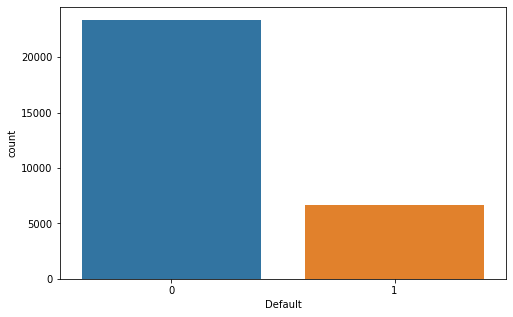

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x=Dataset['Default'], data = Dataset)

In [20]:
Dataset['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

In [21]:
Dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


LIMIT BALANCE

In [22]:
Dataset['LIMIT_BAL'].max()

1000000.0

In [23]:
Dataset['LIMIT_BAL'].min()

10000.0

In [24]:
Dataset['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

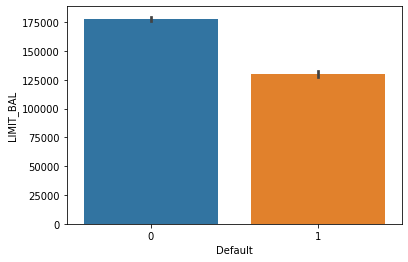

In [25]:
sns.barplot(x='Default', y='LIMIT_BAL', data=Dataset)

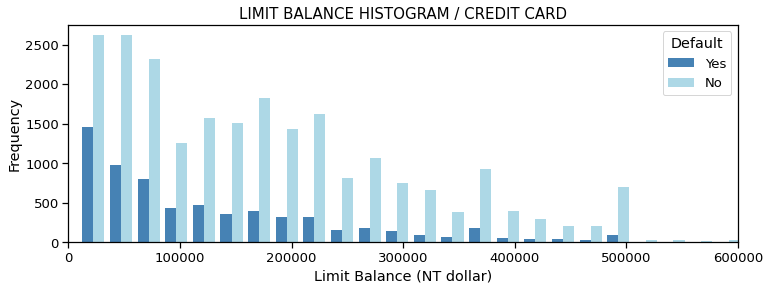

In [27]:
import matplotlib.pyplot as plt

x1 = list(Dataset[Dataset['Default'] == 1]['LIMIT_BAL'])
x2 = list(Dataset[Dataset['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1,x2], density=False, bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM / CREDIT CARD', SIZE=15)
plt.box(True)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

There are 30,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either married or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

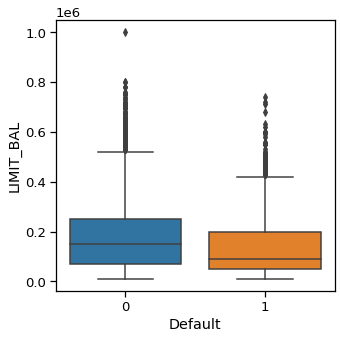

In [28]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x="Default", y="LIMIT_BAL", data=Dataset)

#visualizaton

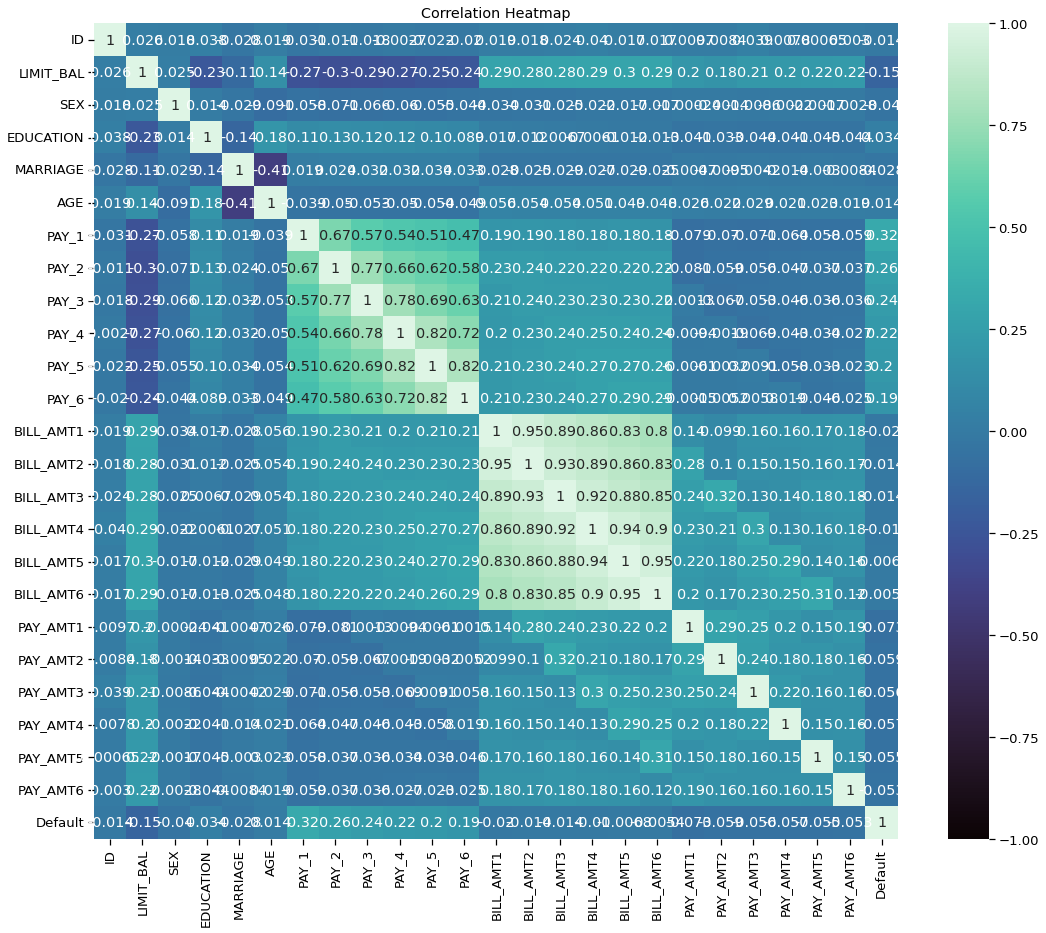

In [29]:
corr = Dataset.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [31]:
Dataset_cat = Dataset[categorical_features]
Dataset_cat['Defaulter'] = Dataset['Default']

In [32]:
Dataset_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 720x360 with 0 Axes>

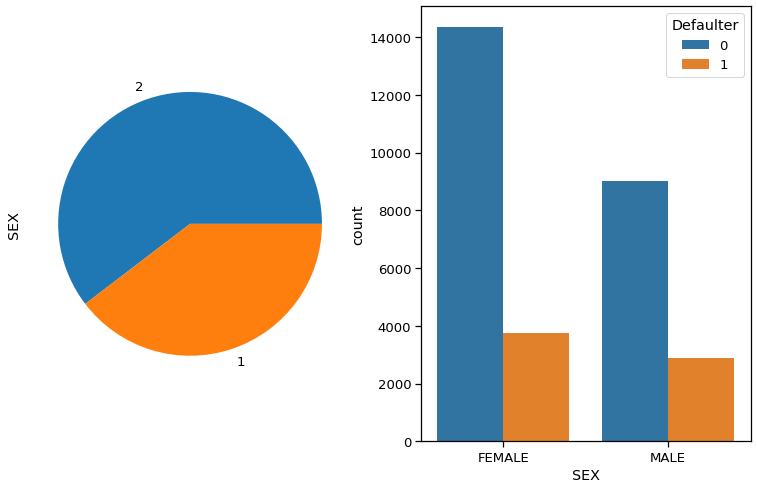

<Figure size 720x360 with 0 Axes>

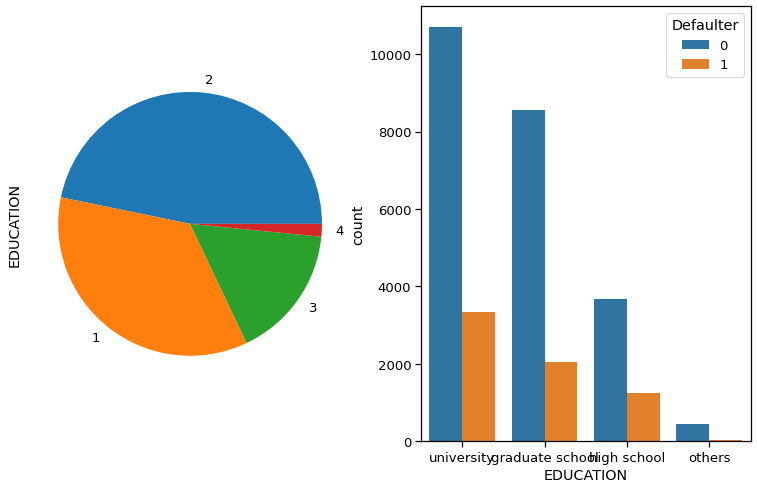

<Figure size 720x360 with 0 Axes>

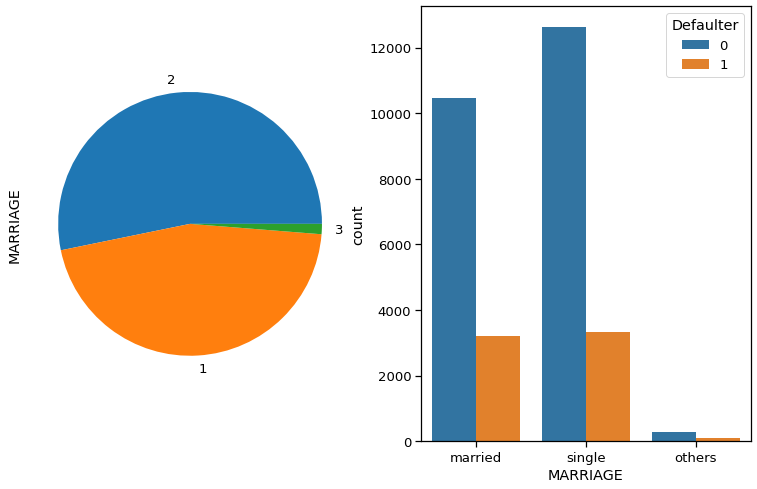

In [37]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  Dataset[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = Dataset_cat)

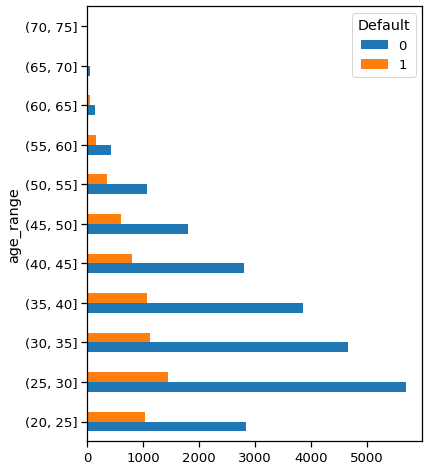

In [ ]:
age = Dataset.copy()
age['age_range'] = pd.cut(Dataset['AGE'], range(20, 80, 5))
age = age[['age_range','Default']].groupby(['age_range', 'Default']).size().unstack(level=1)
age.plot(kind='barh', figsize=(6,8))

few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.

No.of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

No.of defaulters have a higher propotion at age group of 25 to 30.



#models

spliting the data to train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X = Dataset.iloc[:, 1:-1]
y = Dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

Logistic regression

In [ ]:
#from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()
log.fit(X_train,y_train)
pred = log.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [ ]:
print(accuracy)

0.7835555555555556


In [ ]:
confusion_matrix(y_test,pred)

array([[7050,    2],
       [1946,    2]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train= num_pipeline.fit_transform(X_train)

In [ ]:
X_train

array([[ 1.16835512,  0.81520117, -1.12824982, ..., -0.11494415,
        -0.31205037,  0.09799057],
       [ 2.09001707,  0.81520117, -1.12824982, ..., -0.11377787,
         0.67298818,  2.56260619],
       [-0.06052747,  0.81520117,  1.55577694, ..., -0.30932311,
        -0.31205037, -0.28911692],
       ...,
       [-0.90538425,  0.81520117,  1.55577694, ..., -0.24453013,
        -0.29057653, -0.2709566 ],
       [-1.05899458,  0.81520117,  0.21376356, ..., -0.19496349,
        -0.29031385, -0.28911692],
       [ 1.55238093,  0.81520117, -1.12824982, ..., -0.06719171,
        -0.16166782,  0.93954779]])

In [ ]:
X_test= num_pipeline.fit_transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
models = {
    LogisticRegression(): "   Logistic Regression",
    SVC():                "Support Vector Machine",
    MLPClassifier():      "        Neural Network"
  
} 

for model in models.keys():
    model.fit(X_train, y_train)

In [ ]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 81.28%
Support Vector Machine: 81.99%
        Neural Network: 80.96%


Look at performance of classifiers using default parameters

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
predk = knn.predict(X_test)
accuracy = accuracy_score(y_test, predk)
print(accuracy)
confusion_matrix(y_test,predk) 

0.7895555555555556


array([[6445,  607],
       [1287,  661]])

Decision tree classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9992857142857143
Test score 0.7103333333333334


Random Forest Classsifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print('Accuracy score for 10 decision trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score for 10 decision trees : 0.8183


In [ ]:
class predict(object):
    def __init__(self, X, Y):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X , Y, test_size=0.2)

    def Select_Algorithm(self):
        algo = {'Logistic' : {'model' : [LogisticRegression()]},
                'Random Forest' : {'model' : [RandomForestClassifier(n_estimators=500)]},
                'Naive Bayes' : {'model' : [GaussianNB()]},
                'AdaBoost' : {'model' : [AdaBoostClassifier(n_estimators=500)]},
                'Gradien' : {'model' : [GradientBoostingClassifier(n_estimators=500)]}
        }
        res = {'model' : '', 'accuracy' : 0, 'Matrix' : None}
        for x in algo:
            for model in algo[x]['model']:
                model.fit(self.X_train, self.Y_train)
                pred = model.predict(self.X_test)
                accuracy = accuracy_score(self.Y_test, pred)
                if accuracy > res['accuracy']:
                    res['model'] = model
                    res['accuracy'] = accuracy
                    res['Matrix'] = confusion_matrix(self.Y_test, pred)
                print(x, accuracy)
        self.models = algo
        return res


In [ ]:
base_model = predict(X, y)
model = base_model.Select_Algorithm()
res_model = model['model']

Logistic 0.7795
Random Forest 0.8231666666666667
Naive Bayes 0.38483333333333336
AdaBoost 0.8211666666666667
Gradien 0.8253333333333334


In [ ]:
def Matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return plt.show()

In [ ]:
def plot_roc(y_test, y_pred):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

In [ ]:
def plot_Feature(feature, clf):
    tmp = pd.DataFrame({'Feature': feature, 
                        'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    return plt.show()

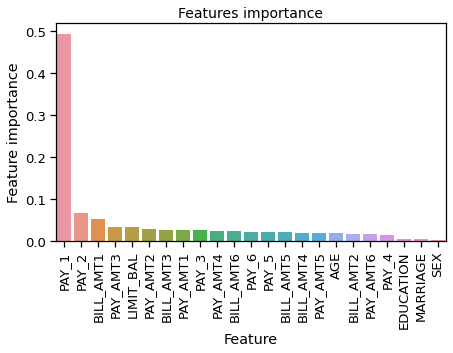

In [ ]:
plot_Feature(X.columns, res_model)

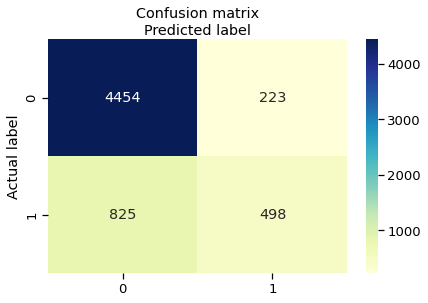

In [ ]:
Matrix(model['Matrix'])

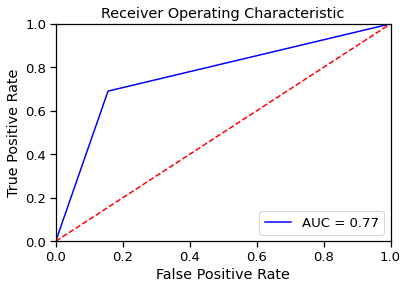

In [ ]:
#from sklearn.metrics import roc_curve
plot_roc(res_model.predict(base_model.X_test), base_model.Y_test)